In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

##### Regression Models 

**Variables/Columns**

- `Age` - years
- `5K Duration` - seconds
- `Height` - inches
- `M/F` - Male or Female


### Read the csv file into a pandas DataFrame

In [2]:
boston2016 = pd.read_csv('marathon/boston_marathon_results_2016.csv')
#boston2016.head()
#boston2016.shape
boston2016.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace',
       'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'],
      dtype='object')

### Use Pandas get_dummies to convert categorical data

In [3]:
# convert male/female to 0/1s

boston2016_mf=pd.get_dummies(boston2016['M/F'])

# join the two dataframes

boston2016_join=pd.concat([boston2016, boston2016_mf], axis=1) 

boston2016_join.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,F,M
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,0:15:47,0:31:20,...,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1,0,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,0:15:47,0:31:21,...,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2,0,1
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,0:15:46,0:31:20,...,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3,0,1
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,0:15:46,0:31:21,...,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,0,1
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,0:15:46,0:31:21,...,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5,0,1


In [5]:
# Convert HH:MM:SS to total seconds

def time_convert(x):
    if x == "-":
        return 0
    else:
        times = x.split(':')
        return (60*int(times[0])+60*int(times[1]))+int(times[2])

boston2016_join['5K Duration'] = boston2016_join['5K'].apply(time_convert)
boston2016_join['10K Duration'] = boston2016_join['10K'].apply(time_convert)
boston2016_join['15K Duration'] = boston2016_join['15K'].apply(time_convert)
boston2016_join['20K Duration'] = boston2016_join['20K'].apply(time_convert)
boston2016_join['Half Duration'] = boston2016_join['Half'].apply(time_convert)
boston2016_join['25K Duration'] = boston2016_join['25K'].apply(time_convert)
boston2016_join['30K Duration'] = boston2016_join['30K'].apply(time_convert)
boston2016_join['35K Duration'] = boston2016_join['35K'].apply(time_convert)
boston2016_join['40K Duration'] = boston2016_join['40K'].apply(time_convert)
boston2016_join['Official Time Duration'] = boston2016_join['Official Time'].apply(time_convert)



boston2016_clean=boston2016_join[['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'F', 'M']]

boston2016_clean.head()

,Bib,Age,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,35K Duration,40K Duration,Official Time Duration,F,M
0,5,21,947,1880,2827,254,465,1215,2117,3084,479,885,0,1
1,1,26,947,1881,2828,254,466,1215,2117,3084,479,932,0,1
2,6,31,946,1880,2827,253,464,1215,2145,3108,527,962,0,1
3,11,33,946,1881,2827,254,466,1216,2145,3108,527,965,0,1
4,14,23,946,1881,2828,254,466,1218,2146,3150,611,1065,0,1


### Assign X (data) and y (target)
Make sure the data is in the appropriate shape

In [8]:
### set up data for modeling
X = boston2016_clean[['Age','Bib','5K Duration', '10K Duration', '15K Duration', '20K Duration', 'Half Duration', '25K Duration', '30K Duration', '35K Duration', '40K Duration','F', 'M']]
y = boston2016_clean["Official Time Duration"].values.reshape(-1, 1)
print(X.shape, y.shape)

(26630, 13) (26630, 1)


### Split the data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)


### Create a `StandardScaler` model and fit it to the training data

In [10]:
from sklearn.preprocessing import StandardScaler

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Transform the training and testing data using the your `StandardScaler` models created above

In [11]:
### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Create a LinearRegression model and fit it to the scaled training data

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the scaled test data

In [13]:
predictions = model.predict(X_test_scaled)

### Plot the residual plot for the predictions on the scaled training and test data 

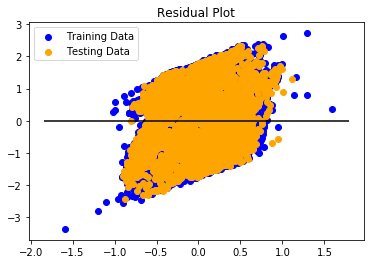

In [14]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### Calculate MSE and $R^2$ for the model

In [15]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8535534275409464, R2: 0.13019156693022949


### LASSO model

performs feature selection by reducing small coefficient values to absolute zero

In [16]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8547180331594715, R2: 0.12900478265228232


### Ridge model

reduces multicollinearity
create plot to show differences in coefficient values
use code from here: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [17]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8535534154330618, R2: 0.13019157926869585


### ElasticNet model

In [18]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8542009662928206, R2: 0.1295316965003933
